In [1]:
import selenium
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
import requests
from bs4 import BeautifulSoup

In [2]:
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException

In [5]:
driver = webdriver.Edge()

In [6]:
# Question 1
# Write a python program which searches all the product under a particular product from www.amazon.in. 
# The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [7]:
# Solution 1

In [8]:
driver.get("https://www.amazon.in/")

In [9]:
search_product = driver.find_element(By.XPATH, '/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
search_product.send_keys("guitar")

In [10]:
search_btn = driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search_btn.click()

In [11]:
# Question 2
# In the above question, now scrape the following details of each product listed in first 3 pages of your search results 
# and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the 
# products available under that product name. Details to be scraped are: "Brand
# Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and
# “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [12]:
# Solution 2

In [23]:
start = 0
end = 3
product_url = []
for page in range(start,end):
    product_url_tags = driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in product_url_tags:
        product_url.append(i.get_attribute('href'))
    next_btn = driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
    next_btn.click()
    time.sleep(5)

In [24]:
len(product_url)

178

In [25]:
product_url

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4MTg3Mzg3NjYxNjA5MDUyOjE3MDg2MjIwMTk6c3BfYXRmOjMwMDAxNTUzNzk3OTIzMjo6MDo6&url=%2FKadence-Frontier-Acoustic-Guitar-Strings%2Fdp%2FB078GTJP5Y%2Fref%3Dsr_1_1_sspa%3Fcrid%3D2BBYOXSKC83R1%26dib%3DeyJ2IjoiMSJ9.crxhhcuVe8Gag3-0mnCXJnJHne6N_F_8QTotLPUcJ2KqM8VWO2bZ9Q4-cyVWhDYcHiiAtTpeWFPmcb0g_8jqtcKKhewsG9sZkT3mc4fnxq_4vs00NZIKwlpQ7pI88jJTSzuO3jzKqYidqOpE458X887WJvmveDmEXgC4zzLucX93A7mWYde3av6st23p3-91d6GFKXi91eYyv0URyiP0T_JisLQNLQ87ngZDUuIU0qm-vpfty-ep97vX4NVnDMkLEMurLtuZQK3eKEGtJIPpSfQJOPZpllWEKUq_cXEwXS8.2_6C9Z3X4pppKz9FbmSA1RxBY5E3oRjvFcU0_f09jNg%26dib_tag%3Dse%26keywords%3Dguitar%26qid%3D1708622019%26sprefix%3Dguitar%252Caps%252C222%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4MTg3Mzg3NjYxNjA5MDUyOjE3MDg2MjIwMTk6c3BfYXRmOjMwMDAxNTUwODk1NDEzMjo6MDo6&url=%2FKadence-Frontier-Acoustic-Guitar-Strings%2Fdp%2FB01GDZ46AA%2Fref%3Dsr_1_2_sspa%3Fcrid%3D2BBYOXSKC83R1%26dib%3DeyJ2Ijoi

In [26]:
product_name = []
brand_name = []
product_price = []
return_exchange = []
delivery = []
availability = []

In [27]:
for i in product_url:
    driver.get(i)
    time.sleep(5)
    # fetching brand name
    try:
        brand = driver.find_element(By.XPATH,'//a[@id="bylineInfo"]')
        brand_name.append(brand.text)
    except NoSuchElementException:
        brand_name.append('-')
    # fetching product name
    try:
        productName = driver.find_element(By.XPATH,'//span[@id="productTitle"]')
        product_name.append(productName.text)
    except NoSuchElementException:
        product_name.append('-')
    # fetching product price
    try:
        productPrice = driver.find_element(By.CLASS_NAME,"a-price-whole")
        product_price.append(productPrice.text)
    except NoSuchElementException:
        product_price.append('-')
    # fetching return exchange
    try:
        returnOrNot = driver.find_element(By.XPATH,'//span[@class="a-declarative"]/div[1]/span')
        return_exchange.append(returnOrNot.text)
    except NoSSuchElementException:
        return_exchange.append('-')
    # fetching delivery
    try:
        deliveryTags = driver.find_element(By.XPATH,'//div[@id="mir-layout-DELIVERY_BLOCK"]/div/span')
        delivery.append(deliveryTags.text)
    except NoSuchElementException:
        delivery.append('-')
    # fetching availability
    try:
        avail = driver.find_element(By.XPATH,'//div[@id="availability"]/span')
        availability.append(avail.text)
    except NoSuchElementException:
        availability.append('-')

In [28]:
print(len(product_price),len(brand_name),len(delivery),len(product_name),len(return_exchange),len(availability))

178 178 178 178 178 178


In [30]:
import pandas as pd
df = pd.DataFrame()
df['Brand Name'] = brand_name
df['Product Name'] = product_name
df['Product Price'] = product_price
df['Product URL'] = product_url
df['Availability'] = availability
df['Return/Exchange'] = return_exchange
df['Delivery'] = delivery

In [31]:
df

,Brand Name,Product Name,Product Price,Product URL,Availability,Return/Exchange,Delivery
0,Visit the Kadence Store,"Kadence rosewood Guitar Frontier Series, Elect...","5,499",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,In stock,,"FREE delivery Wednesday, 28 February. Order wi..."
1,Visit the Kadence Store,Kadence Frontier guitar with Online Guitar lea...,"4,499",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,In stock,,"FREE delivery Wednesday, 28 February. Order wi..."
2,Visit the Kadence Store,Kadence Slowhand Premium Jumbo Semi Acoustic G...,"9,999",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,In stock,,"FREE delivery Monday, 26 February. Order withi..."
3,Visit the MOCKING BIRD Store,MOCKING BIRD 38 inch Acoustic Guitar for Begin...,"3,249",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,In stock,,"FREE delivery Wednesday, 28 February. Details"
4,Visit the Intern Store,"Intern INT-38C Right hand Acoustic Guitar Kit,...","1,995",https://www.amazon.in/Intern-INT-38C-Acoustic-...,In stock,,"FREE delivery Tuesday, 27 February. Details"
...,...,...,...,...,...,...,...
173,Brand: YAMAHA,Yamaha FS80C 25.0 Incheses sprucewood The Ulti...,"8,989",https://www.amazon.in/FS80C-Ultimate-Acoustic-...,Only 2 left in stock.,,"FREE delivery Thursday, 29 February. Details"
174,Brand: YAMAHA,"Yamaha A-Series A1R Acoustic-Electric Guitar, ...","56,990",https://www.amazon.in/Yamaha-A1R-Acoustic-Elec...,Only 1 left in stock.,,"FREE delivery Thursday, 29 February. Order wit..."
175,Brand: Schecter,Schecter Sun Valley Super Shredder FR-S Electr...,"79,099",https://www.amazon.in/Schecter-Valley-Shredder...,Only 1 left in stock.,,"FREE delivery Monday, 26 February. Order withi..."
176,Brand: Belear,"Belear I280 38 Inch Black Matt Spruce Cutaway,...","2,699",https://www.amazon.in/Belear-Spruce-Cutaway-Ac...,In stock,,"FREE delivery Thursday, 29 February. Order wit..."


In [32]:
# Question 3
# Write a python program to access the search bar and search button on images.google.com 
# and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [33]:
# Solution 3

In [35]:
driver.get("https://images.google.co.in/")

In [9]:
search_keywords = ['fruits','cars','Machine Learning','Guitar','Cakes']
images_url = []
for keyword in search_keywords:
    driver.get("https://images.google.co.in/")
    type_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
    type_btn.send_keys(keyword)
    search_btn = driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
    search_btn.click()

    img = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in img[0:10]:
        images_url.append(i.get_attribute('src'))
    
    

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
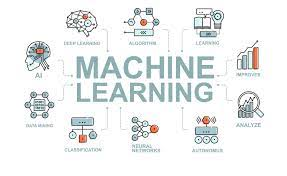
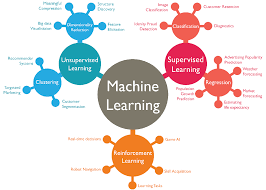
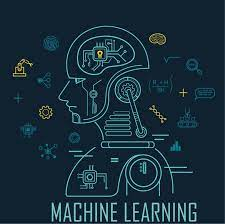
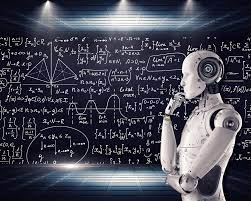
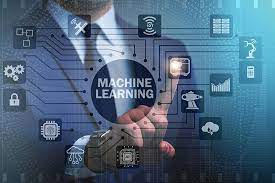
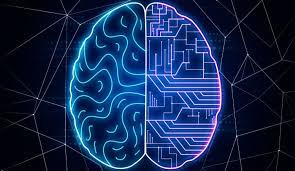
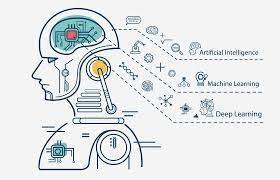
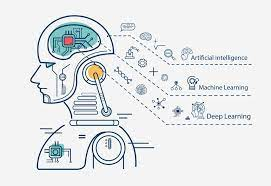
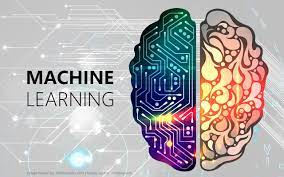
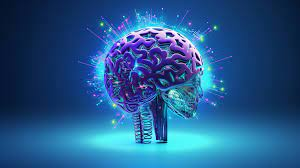
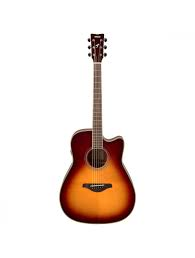
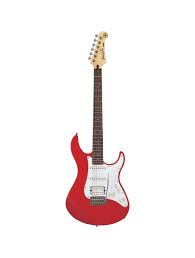
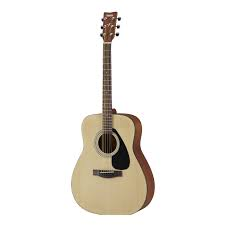
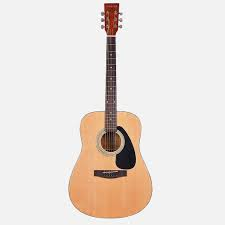
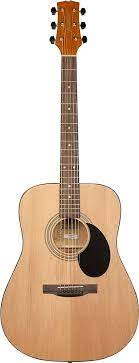
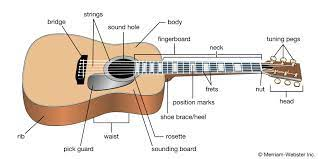
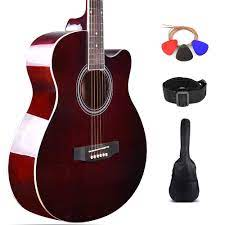
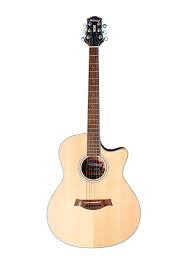
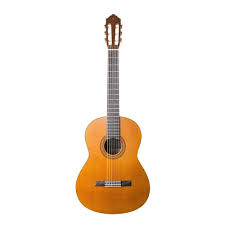
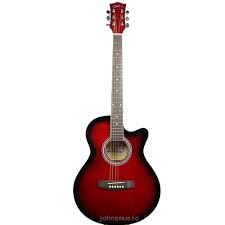

In [10]:
images_url

In [11]:
# Question 4
# Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com 
# and scrape following details for all the search results displayed on 1st page. Details to be scraped: 
# “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,
# “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. 
# Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [12]:
driver.get("https://www.flipkart.com/")

In [13]:
login = driver.find_element(By.XPATH,'//div[@class="uiU-ZX"]')
login.click()

In [14]:
type_box = driver.find_element(By.XPATH,'/html/body/div/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
type_box.send_keys("Smartphone")

In [15]:
click_btn = driver.find_element(By.XPATH,'/html/body/div/div/div[1]/div[1]/div[2]/div[2]/form/div/button')
click_btn.click()

In [16]:
mobile_url = []
mobile_tags = driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
for i in mobile_tags:
    mobile_url.append(i.get_attribute('href'))

In [17]:
mobile_url

['https://www.flipkart.com/motorola-g34-5g-ice-blue-128-gb/p/itmc36bacc1f7bb0?pid=MOBGUFK4P2H9CY7Y&lid=LSTMOBGUFK4P2H9CY7Y4FYWMH&marketplace=FLIPKART&q=Smartphone&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=37d750fc-9b1a-48a5-b423-fbf633533f11.MOBGUFK4P2H9CY7Y.SEARCH&ppt=hp&ppn=homepage&ssid=52hohc50kg0000001708629438453&qH=853ca16bda4f3d30',
 'https://www.flipkart.com/motorola-g34-5g-ocean-green-128-gb/p/itm6b1a33b9d9191?pid=MOBGUFK4TZ2CJYHJ&lid=LSTMOBGUFK4TZ2CJYHJPBUF6M&marketplace=FLIPKART&q=Smartphone&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=37d750fc-9b1a-48a5-b423-fbf633533f11.MOBGUFK4TZ2CJYHJ.SEARCH&ppt=hp&ppn=homepage&ssid=52hohc50kg0000001708629438453&qH=853ca16bda4f3d30',
 'https://www.flipkart.com/poco-c55-cool-blue-128-gb/p/itm26aca9fd143ba?pid=MOBGMXSWJHRVUWFE&lid=LSTMOBGMXSWJHRVUWFESKZGEW&marketplace=FLIPKART&q=Smartphone&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search&fm=organic&iid=37d750fc-9b1a

In [22]:
phone_name = []
color = []
ram = []
rom = []
camera_primary = []
camera_secondary = []
display_size = []
battery_capacity = []
price = []

In [23]:
brand_name = []

In [24]:
for i in mobile_url:
    driver.get(i)
    time.sleep(5)

    try:
        price_tag = driver.find_element(By.XPATH,'//div[@class="_30jeq3 _16Jk6d"]')
        price.append(price_tag.text)
    except NoSuchElementException:
        price.append('-')
        
    # click read more to know more
    try:
        read_more = driver.find_element(By.XPATH,'//button[@class="_2KpZ6l _1FH0tX"]')
        read_more.click()
    except NoSuchElementException as e:
        print("Exception Raised: ", e)

    #scraping brand name of smartphone
    try:
        brand_tags = driver.find_element(By.XPATH,"//span[@class='B_NuCI']")
        brand_name.append(brand_tags.text.split()[0])
    except NoSuchElementException:
        brand_name.append('-')
    
    
    # scraping name of smartphones
    try:
        name_tags = driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][1]/table/tbody/tr[3]/td[2]/ul/li")
        phone_name.append(name_tags.text)
    except NoSuchElementException:
        phone_name.append('-')
        
    #scraping colour of smartphone
    try:
        color_tags = driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][1]/table/tbody/tr[4]/td[2]/ul/li")
        color.append(color_tags.text)
    except NoSuchElementException:
        color.append('-')
        
    # scraping RAM data of smartphone
    try:
        ram_tags = driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][4]/table[1]/tbody/tr[2]/td[2]/ul/li")
        ram.append(ram_tags.text)
    except NoSuchElementException:
        ram.append('-')

    #scraping ROM data of smartphones
    try:
        rom_tags = driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][4]/table[1]/tbody/tr[1]/td[2]/ul/li")
        rom.append(rom_tags.text)
    except NoSuchElementException:
        rom.append('-')
        
    # scraping  Primary camera data of smartphone
    try:
        pri =driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][5]/table[1]/tbody/tr[2]/td[2]/ul/li")
        camera_primary.append(pri.text)
    except NoSuchElementException:
        camera_primary.append('-')

    # scraping secondary camera data of smartphone
    try:
        sec = driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][5]/table[1]/tbody/tr[6]/td[1]")
        if sec != 'Secondary Camera' :
            if driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][5]/table[1]/tbody/tr[5]/td[1]").text == "Secondary Camera":
                sec_cam =driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][5]/table[1]/tbody/tr[5]/td[2]/ul/li")
            else :
                raise NoSuchElementException
        else :
            sec_cam = driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][5]/table[1]/tbody/tr[6]/td[2]/ul/li")
        camera_secondary.append(sec_cam.text)
    except NoSuchElementException:
        camera_secondary.append('-')
        
    
    #scraping display size data of smartphone
    try:
        disp = driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][2]/div")
        if disp.text != 'Display Features' : raise NoSuchElementException
        disp_size = driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][2]/table[1]/tbody/tr[1]/td[2]/ul/li")
        display_size.append(disp_size.text)
    except NoSuchElementException:
        display_size.append('-')

    # scraping the battery capacity of smartphone
    try:
        if driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][10]/div").text != "Battery & Power Features" :
            if driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][9]/div").text == "Battery & Power Features" :
                bat_tags = driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][9]/table/tbody/tr/td[1]")
                if bat_tags.text != "Battery Capacity" : raise NoSuchElementException
                bat_capa = driver.find_elementh(By.XPATH,"//div[@class='_3k-BhJ'][9]/table/tbody/tr/td[2]/ul/li")
            elif driver.find_element_by_xpath(By.XPATH,"//div[@class='_3k-BhJ'][8]/div").text == "Battery & Power Features" :
                bat_tags = driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][8]/table/tbody/tr/td[1]")
                if bat_tags.text != "Battery Capacity" : raise NoSuchElementException
                bat_capa = driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][8]/table/tbody/tr/td[2]/ul/li")
            else:
                raise NoSuchElementException
        else :
            bat_tags = driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][10]/table/tbody/tr/td[1]")
            if bat_tags.text != "Battery Capacity" : raise NoSuchElementException
            bat_capa = driver.find_element(By.XPATH,"//div[@class='_3k-BhJ'][10]/table/tbody/tr/td[2]/ul/li")
        battery_capacity.append(bat_capa.text)
    except NoSuchElementException:
        battery_capacity.append('-')

In [26]:
import pandas as pd
Smartphones = pd.DataFrame()
Smartphones['Brand'] = brand_name
Smartphones['Phone name'] = phone_name
Smartphones['Colour'] = color
Smartphones['RAM'] = ram
Smartphones['Storage(ROM)'] = rom
Smartphones['Primary Camera'] = camera_primary
Smartphones['Secondary Camera'] = camera_secondary
Smartphones['Display Size'] = display_size
Smartphones['Battery Capacity'] = battery_capacity
Smartphones['Price'] = price
Smartphones['URL'] = mobile_url

In [27]:
Smartphones

,Brand,Phone name,Colour,RAM,Storage(ROM),Primary Camera,Secondary Camera,Display Size,Battery Capacity,Price,URL
0,Motorola,G34 5G,Ice Blue,8 GB,128 GB,50MP + 2MP,16MP Front Camera,16.51 cm (6.5 inch),5000 mAh,"₹11,999",https://www.flipkart.com/motorola-g34-5g-ice-b...
1,Motorola,G34 5G,Ocean Green,8 GB,128 GB,50MP + 2MP,16MP Front Camera,16.51 cm (6.5 inch),5000 mAh,"₹11,999",https://www.flipkart.com/motorola-g34-5g-ocean...
2,POCO,C55,Cool Blue,6 GB,128 GB,50MP Dual Rear Camera,5MP Front Camera,17.04 cm (6.71 inch),5000 mAh,"₹6,499",https://www.flipkart.com/poco-c55-cool-blue-12...
3,POCO,C55,Power Black,6 GB,128 GB,50MP Dual Rear Camera,5MP Front Camera,17.04 cm (6.71 inch),5000 mAh,"₹6,499",https://www.flipkart.com/poco-c55-power-black-...
4,realme,C53,Champion Gold,6 GB,64 GB,108MP + 2MP,-,17.12 cm (6.74 inch),5000 mAh,"₹8,999",https://www.flipkart.com/realme-c53-champion-g...
5,POCO,C55,Forest Green,6 GB,128 GB,50MP Dual Rear Camera,5MP Front Camera,17.04 cm (6.71 inch),5000 mAh,"₹6,499",https://www.flipkart.com/poco-c55-forest-green...
6,realme,C53,Champion Black,6 GB,64 GB,108MP + 2MP,-,17.12 cm (6.74 inch),5000 mAh,"₹8,999",https://www.flipkart.com/realme-c53-champion-b...
7,Motorola,G34 5G,Ocean Green,4 GB,128 GB,50MP + 2MP,16MP Front Camera,16.51 cm (6.5 inch),5000 mAh,"₹10,999",https://www.flipkart.com/motorola-g34-5g-ocean...
8,OnePlus,Nord CE 3 Lite 5G,Pastel Lime,8 GB,256 GB,Primary Camera,-,17.07 cm (6.72 inch),-,"₹19,597",https://www.flipkart.com/oneplus-nord-ce-3-lit...
9,OnePlus,Nord CE 3 Lite 5G,Chromatic Gray,8 GB,256 GB,Primary Camera,-,17.07 cm (6.72 inch),-,"₹19,540",https://www.flipkart.com/oneplus-nord-ce-3-lit...


In [6]:
# Question 5
# Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [7]:
# Solution 5

In [8]:
driver.get("https://maps.google.co.in")

In [9]:
search_box = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/form/input')
search_box.send_keys("Delhi")

In [10]:
click_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/div[1]/button')
click_btn.click()

In [11]:
import regex as re
help(re)

Help on package regex:

NAME
    regex - Support for regular expressions (RE).

DESCRIPTION
    This module provides regular expression matching operations similar to those
    found in Perl. It supports both 8-bit and Unicode strings; both the pattern and
    the strings being processed can contain null bytes and characters outside the
    US ASCII range.
    
    Regular expressions can contain both special and ordinary characters. Most
    ordinary characters, like "A", "a", or "0", are the simplest regular
    expressions; they simply match themselves. You can concatenate ordinary
    characters, so last matches the string 'last'.
    
    There are a few differences between the old (legacy) behaviour and the new
    (enhanced) behaviour, which are indicated by VERSION0 or VERSION1.
    
    The special characters are:
        "."                 Matches any character except a newline.
        "^"                 Matches the start of the string.
        "$"                 Matches 

In [15]:
try:
    url = driver.current_url
    lat_long = re.findall(r'@(.*)data',url)
    if lat_long:
        lat_long_list = lat_long[0].split(",")
        if len(lat_long_list) >= 2:
            lat = lat_long_list[0]
            long = lat_long_list[1]
        print("Latitude :", lat, "\n","Longitude :",long)
except Exception as e:
    print("Exception Raised:",e)
        

Latitude : 28.6440836 
 Longitude : 77.0932312


In [16]:
# Question 6
# Write a program to scrap all the available details of best gaming laptops from digit.in.

In [17]:
# Solution 6

In [18]:
driver.get("https://www.digit.in/")

In [19]:
click_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div/div/div/article/div/div/div/div[2]/div/div[2]/div[5]/div[1]/div[2]/div[1]/div[1]/a')
click_btn.click()

In [20]:
laptop_url = []
laptop_tags = driver.find_elements(By.XPATH,'//h3[@class="font130 mt0 mb10 mobilesblockdisplay "]/a')
for i in laptop_tags:
    laptop_url.append(i.get_attribute('href'))

In [21]:
laptop_url

['https://www.digit.in/laptops/asus-rog-zephyrus-g14-ga402xz-n2019ws.html',
 'https://www.digit.in/laptops/msi-pulse-17-ai-c1vgkg.html',
 'https://www.digit.in/laptops/acer-nitro-16-an16-41-r1vt.html',
 'https://www.digit.in/laptops/msi-bravo-15-c7vfkp.html',
 'https://www.digit.in/laptops/asus-tuf-gaming-a16-advantage-edition-2023-fa617xs.html',
 'https://www.digit.in/laptops/hp-omen-gaming-laptop-16-xd0007ax.html',
 'https://www.digit.in/laptops/dell-new-g15-5535.html']

In [34]:
# creating empty list
Laptop_Name = []
Operating_sys = []
Display = []
Processor = []
Storage = []

In [35]:
for url in laptop_url:
    driver.get(url)
    time.sleep(5)
    laptop_name_tag = driver.find_element(By.XPATH,'//h1[@class="floatleft tabletblockdisplay pr20 "]')
    Laptop_Name.append(laptop_name_tag.text)
    op_sys_tag = driver.find_element(By.XPATH,'//div[@class="specs_details "]/ul/li[1]/div/p[2]/strong')
    Operating_sys.append(op_sys_tag.text)
    display_tag = driver.find_element(By.XPATH,'//div[@class="specs_details "]/ul/li[2]/div/p[2]/strong')
    Display.append(display_tag.text)
    processor_tag = driver.find_element(By.XPATH,'//div[@class="specs_details "]/ul/li[3]/div/p[2]/strong')
    Processor.append(processor_tag.text)
    storage_tag = driver.find_element(By.XPATH,'//div[@class="specs_details "]/ul/li[4]/div/p[2]/strong')
    Storage.append(storage_tag.text)
    

In [36]:
print(len(Laptop_Name),len(Operating_sys),len(Display),len(Processor),len(Storage))

7 7 7 7 7


In [37]:
import pandas as pd
df = pd.DataFrame()
df['Laptop Name'] = Laptop_Name
df['Operating System'] = Operating_sys
df['Display'] = Display
df['Processor'] = Processor
df['Storage'] = Storage

In [38]:
df

,Laptop Name,Operating System,Display,Processor,Storage
0,Asus ROG Zephyrus G14 GA402XZ-N2019WS,Windows 11 Home,14,"7th Gen, AMD Ryzen 9 7940HS",1 TB
1,MSI Pulse 17 AI C1VGKG,Windows 11 Home,17,Intel Core Ultra 9,2 TB
2,Acer Nitro 16 AN16-41-R1VT,Windows 11 Home,16,AMD Ryzen 7-7840HS,512 GB
3,MSI Bravo 15 C7VFKP,Windows 11 Home,15.6,AMD Ryzen 7-7000HS,1 TB
4,ASUS TUF Gaming A16 Advantage Edition (2023) F...,Windows 11 Home,16,AMD Ryzen 9-7940HS,1 TB
5,HP OMEN Gaming Laptop 16 XD0007ax,Windows 11 Home,16.1,AMD Ryzen 7-7840HS,1 TB
6,Dell New G15 5535,Windows 11 Home,15.6,AMD Ryzen 5-7640HS,1 TB


In [39]:
# Question 7
# Write a python program to scrape the details for all billionaires from www.forbes.com. 
# Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [117]:
driver = webdriver.Edge()

In [118]:
# getting the specified url
url = "https://www.forbes.com/"
driver.get(url)

In [119]:
nav_btn = driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div')
nav_btn.click()

In [121]:
driver.get('https://www.forbes.com/billionaires/')

In [138]:
rank = []
name = []
net_worth = []
age = []
citizenship = []
source = []
industry = []

In [139]:
top_billn_rank = driver.find_element(By.XPATH,'//div[@class="TableRow_row__L-0Km TableRow_activeRow__g4oSF"]/div[1]')
top_billn_rank.text

'1'

In [140]:
rank.append(top_billn_rank.text)

In [141]:
top_billn_name = driver.find_element(By.XPATH,'//div[@class="TableRow_row__L-0Km TableRow_activeRow__g4oSF"]/div[2]')
top_billn_name.text

'Bernard Arnault & family'

In [142]:
name.append(top_billn_name.text)

In [143]:
top_billn_net_worth = driver.find_element(By.XPATH,'//div[@class="TableRow_row__L-0Km TableRow_activeRow__g4oSF"]/div[3]')
top_billn_net_worth.text

'$211 B'

In [144]:
net_worth.append(top_billn_net_worth.text)

In [145]:
top_billn_age = driver.find_element(By.XPATH,'//div[@class="TableRow_row__L-0Km TableRow_activeRow__g4oSF"]/div[4]')
top_billn_age.text

'74'

In [146]:
age.append(top_billn_age.text)

In [147]:
top_billn_citizen = driver.find_element(By.XPATH,'//div[@class="TableRow_row__L-0Km TableRow_activeRow__g4oSF"]/div[5]')
citizenship.append(top_billn_citizen.text)

In [148]:
top_billn_source = driver.find_element(By.XPATH,'//div[@class="TableRow_row__L-0Km TableRow_activeRow__g4oSF"]/div[6]')
source.append(top_billn_source.text)

In [149]:
top_billn_industry = driver.find_element(By.XPATH,'//div[@class="TableRow_row__L-0Km TableRow_activeRow__g4oSF"]/div[7]')
industry.append(top_billn_industry.text)

In [150]:
for i in range(0,2):
    ranks_tag = driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[1]')
    names_tag = driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[2]')
    networth_tag = driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[3]')
    age_tag = driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[4]')
    citizen_tag = driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[5]')
    source_tag = driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[6]')
    industry_tag = driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[7]')
    for i in ranks_tag:
        rank.append(i.text)
    for i in names_tag:
        name.append(i.text)
    for i in networth_tag:
        net_worth.append(i.text)
    for i in age_tag:
        age.append(i.text)
    for i in citizen_tag:
        citizenship.append(i.text)
    for i in source_tag:
        source.append(i.text)
    for i in industry_tag:
        industry.append(i.text)
    # clicking on next button
    try:
        next_button = driver.find_element(By.XPATH,'//button[@class="Pagination_paginationBtn__UIBE-"]')
        next_button.click()
    except:
        break
       
    

In [151]:
import pandas as pd
df = pd.DataFrame()
df['Rank'] = rank
df['Name'] = name
df['Net Worth'] = net_worth
df['Age'] = age
df['Citizenship'] = citizenship
df['Source'] = source
df['Industry'] = industry

In [152]:
df

,Rank,Name,Net Worth,Age,Citizenship,Source,Industry
0,1,Bernard Arnault & family,$211 B,74,France,LVMH,
1,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",
2,3,Jeff Bezos,$114 B,59,United States,Amazon,
3,4,Larry Ellison,$107 B,78,United States,Oracle,
4,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,
...,...,...,...,...,...,...,...
394,390,Radovan Vitek,$6.5 B,51,Czech Republic,Real estate,
395,397,Carl Bennet,$6.4 B,71,Sweden,Investments,
396,397,Stephen Bisciotti,$6.4 B,62,United States,"Staffing, Baltimore Ravens",
397,397,Stanley Druckenmiller,$6.4 B,69,United States,Hedge funds,


In [154]:
# Question 8
# Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [155]:
driver.get("https://www.youtube.com/")

In [156]:
click_video = driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-browse/ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/div[6]/ytd-rich-grid-row[3]/div/ytd-rich-item-renderer/div/ytd-rich-grid-media/div[1]/div[3]/div[1]/h3')
click_video.click()

In [164]:
comments = []
comments_time = []
cmts = driver.find_elements(By.ID,"content-text")
cmts_time = driver.find_elements(By.XPATH,"//a[contains(text(),'ago')]")
while len(comments) <= 500:
    for i in cmts:
        comments.append(i.text)
    for i in cmts_time:
        comments_time.append(i.text)
    time.sleep(5)
    


In [166]:
df = pd.DataFrame()
df['Comments'] = comments
df['Time'] = comments_time

In [167]:
df

,Comments,Time
0,Iyer - sorry\nJethalal - it's okay,2 months ago
1,Iyer - Sorry\nJetha - Its ok,2 months ago
2,अईयर का गुस्सा जायज है \nउसकी नजर जो है बबिता ...,2 months ago
3,12:44 even daya was not able to handle her smi...,1 month ago
4,"0:42 when sodhi says ki मैं भी इसी देश का हूं,...",3 months ago
...,...,...
595,Daily 3 Tim's tiffen lunch dinner...,3 days ago
596,Pls Mehta sahab k boss ki purani secretary ko ...,9 days ago
597,Ma bhi khana ka time hi daka ta hu Roja,12 days ago
598,Har Har Mahadev,2 months ago


In [180]:
driver.close()